<center><img src="prog_lang.jpg" width=500></center>

How can you determine which programming languages and technologies are most widely used? Which languages are gaining or losing popularity, helping you decide where to focus your efforts?

One excellent data source is Stack Overflow, a programming question-and-answer site with more than 16 million questions on programming topics. Each Stack Overflow question is tagged with a label identifying its topic or technology. By counting the number of questions related to each technology, you can estimate the popularity of different programming languages.

In this project, you will use data from the Stack Exchange Data Explorer to examine the relative popularity of R compared to other programming languages.

You'll work with a dataset containing one observation per tag per year, including the number of questions for that tag and the total number of questions that year.

`stack_overflow_data.csv`
|Column|Description|
|------|-----------|
|`year`|The year the question was asked (2008-2020)|
|`tag`|A word or phrase that describes the topic of the question, such as the programming language|
|`num_questions`|The number of questions with a certain tag in that year|
|`year_total`|The total number of questions asked in that year|

In [1]:
# Load necessary packages
library(readr)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Load the dataset
data <- read_csv("stack_overflow_data.csv")

Rows: 420066 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tag
dbl (3): year, num_questions, year_total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# View the dataset
head(data)

year,tag,num_questions,year_total
<dbl>,<chr>,<dbl>,<dbl>
2008,treeview,69,168541
2008,scheduled-tasks,30,168541
2008,specifications,21,168541
2008,rendering,35,168541
2008,http-post,6,168541
2008,static-assert,1,168541


# A tibble: 1 × 5
   year tag   num_questions year_total percentage
  <dbl> <chr>         <dbl>      <dbl>      <dbl>
1  2020 r             52662    5452545      0.966


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


# A tibble: 5 × 1
  tag       
  <chr>     
1 javascript
2 python    
3 java      
4 android   
5 c#        


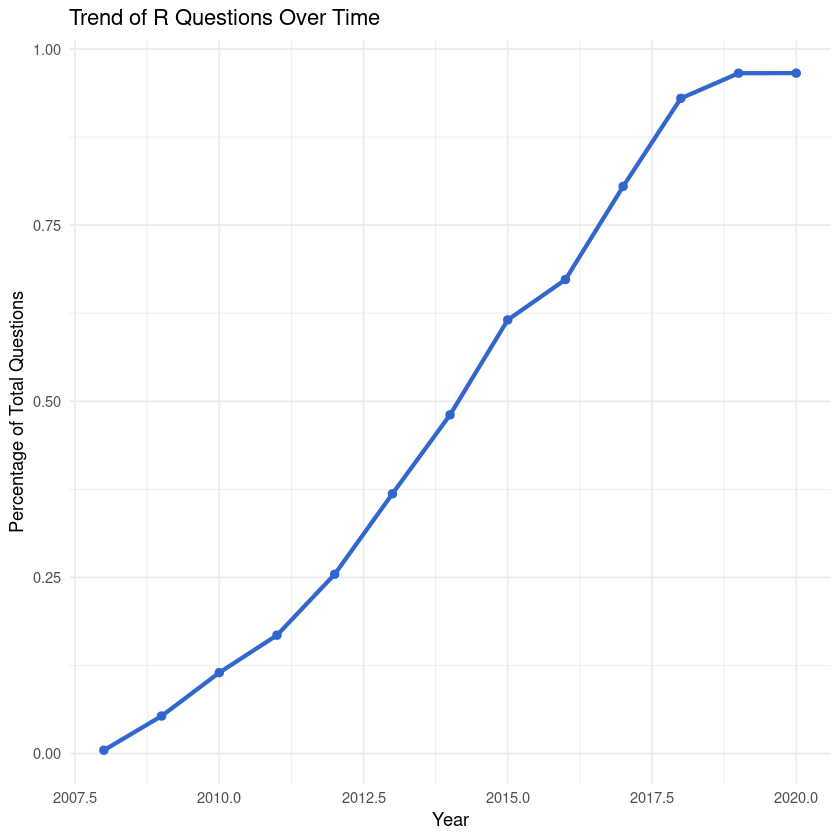

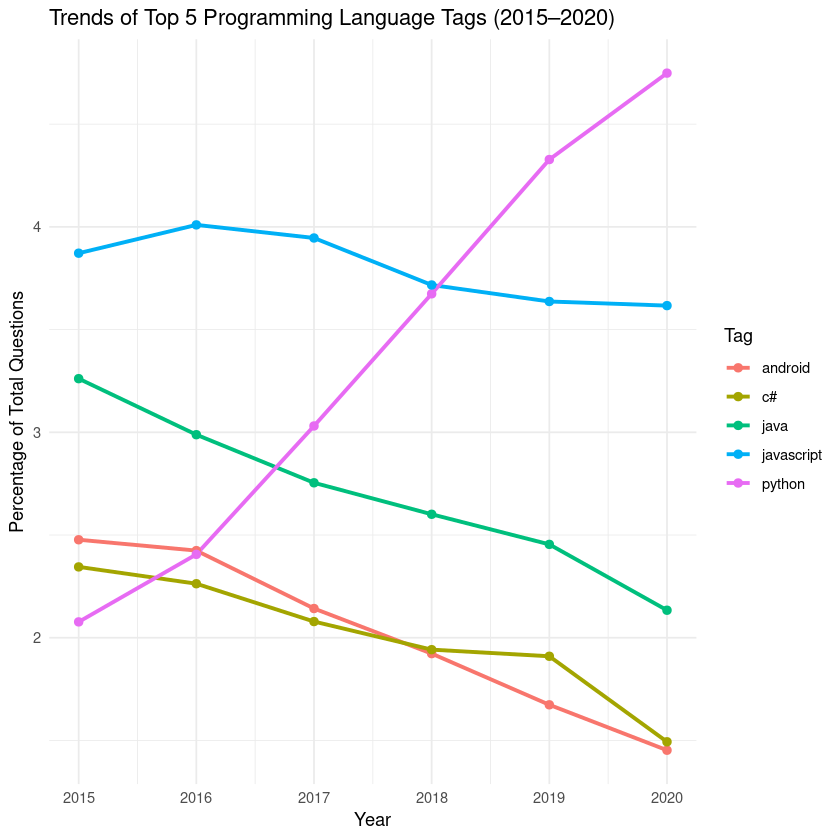

In [ ]:
# Start coding here
# Use as many cells as you like!

# Adding a percentage column into the dataset
data <- data %>%
  mutate(percentage = (num_questions / year_total) * 100)

# --- Question 1 ---
# Filter for R questions in 2020 and keep only required columns
r_2020 <- data %>%
  filter(tag == "r", year == 2020) %>%
  select(year, tag, num_questions, year_total, percentage)

print(r_2020)

# Visualization of the Percentage of R questions over time
ggplot(data %>% filter(tag == "r"), aes(x = year, y = percentage)) +
  geom_line(color = "#3366cc", size = 1.2) +
  geom_point(color = "#3366cc", size = 2) +
  labs(title = "Trend of R Questions Over Time",
       x = "Year",
       y = "Percentage of Total Questions") +
  theme_minimal()

# --- Question 2 ---
# Get total number of questions per tag between 2015 and 2020
tag_totals <- data %>%
  filter(year >= 2015 & year <= 2020) %>%
  group_by(tag) %>%
  summarize(total_questions = sum(num_questions), .groups = 'drop') %>%
  arrange(desc(total_questions))

# Extract top 5 tags
highest_tags <- tag_totals %>%
  slice_head(n = 5) %>%
  select(tag)

print(highest_tags)

# Visualize trends of top 5 tags
top_tags <- highest_tags$tag

top_tag_data <- data %>%
  filter(tag %in% top_tags, year >= 2015)  # restrict to 2015–2020 for cleaner plot

ggplot(top_tag_data, aes(x = year, y = percentage, color = tag)) +
  geom_line(size = 1.1) +
  geom_point(size = 2) +
  labs(title = "Trends of Top 5 Programming Language Tags (2015–2020)",
       x = "Year",
       y = "Percentage of Total Questions",
       color = "Tag") +
  theme_minimal()
